In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import src.tuning as t



# Simulated Annealing
Not used for the ICA paper, because it converges to 0.000005 for both pars.

In [5]:
# Instantiate tuning
tuning = t.SimulatedAnnealing()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:170: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(SimulatedAnnealing, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


## 1. Nomination Network

### 1.1 Run simulation

In [6]:
parameters, error_hist, parameters_hist = tuning.execute(t_initial=0.2,
                                                         i_initial=0.05,
                                                         t=700,
                                                         population_name="nomination")

thres_PA:  0.2  I_PA:  0.05 |runtime:  5.437083005905151

Temp:  1.0
1.0 1 thres_PA:  0.24932594897034632  I_PA:  0.06955373656686929 cost:  1.4053698094842022 |runtime:  5.466063976287842
1.0 2 thres_PA:  0.17077155464036614  I_PA:  0.009046384344047018 cost:  1.0679746526925924 |runtime:  5.4997241497039795
1.0 3 thres_PA:  0.1417636225333891  I_PA:  0.0452783674988312 cost:  1.332196165268034 |runtime:  5.408727169036865
1.0 4 thres_PA:  0.08523160868908106  I_PA:  0.0676207971374878 cost:  1017.0684066496268 |runtime:  5.492961645126343
1.0 5 thres_PA:  0.0452484127733023  I_PA:  0.0650684555158064 cost:  386.23603034507227 |runtime:  5.438816070556641
1.0 6 thres_PA:  0.17626049445894929  I_PA:  0.058498256230546095 cost:  1.3941014243509233 |runtime:  5.388291835784912
1.0 7 thres_PA:  0.07558859477767166  I_PA:  0.08735651157948546 cost:  615.459960203881 |runtime:  6.200201988220215
1.0 8 thres_PA:  0.1917180328291487  I_PA:  0.03620608983730476 cost:  1.2286664867413333 |runti

### 1.2 Results

In [7]:
min(error_hist)

0.5871830414388567

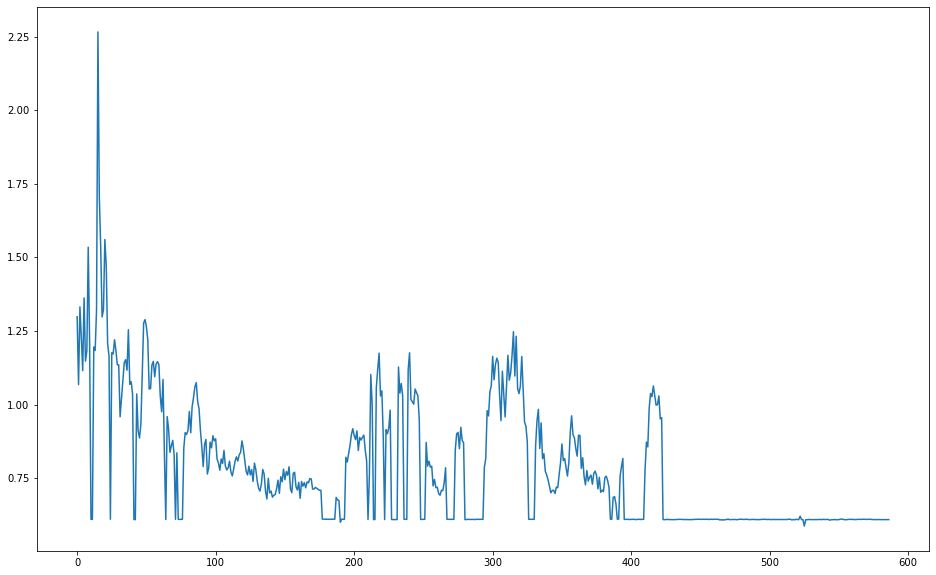

In [8]:
plt.figure(figsize=((16,10)))
plt.plot(error_hist)

In [9]:
thres_h_all = np.asarray([p_all[0] for p_all in parameters_hist])
ipa_h_all = np.asarray([p_all[1] for p_all in parameters_hist])
cost_h_all = np.asarray(error_hist)

Text(0, 0.5, 'I PA')

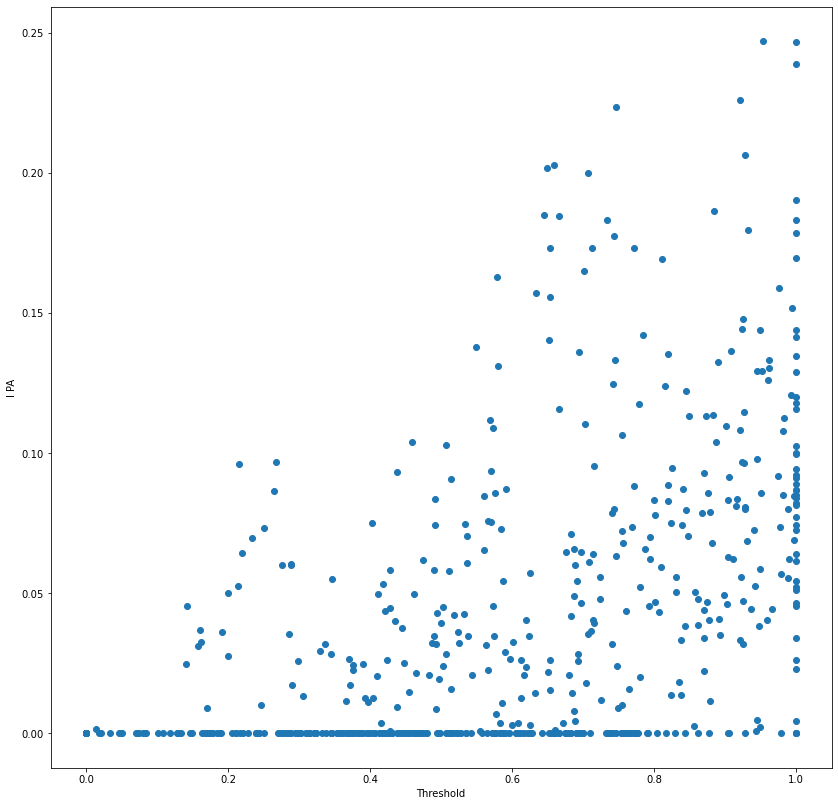

In [10]:
plt.figure(figsize=((14,14)))
plt.scatter(thres_h_all, ipa_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')


Text(0.5, 0, 'I PA')

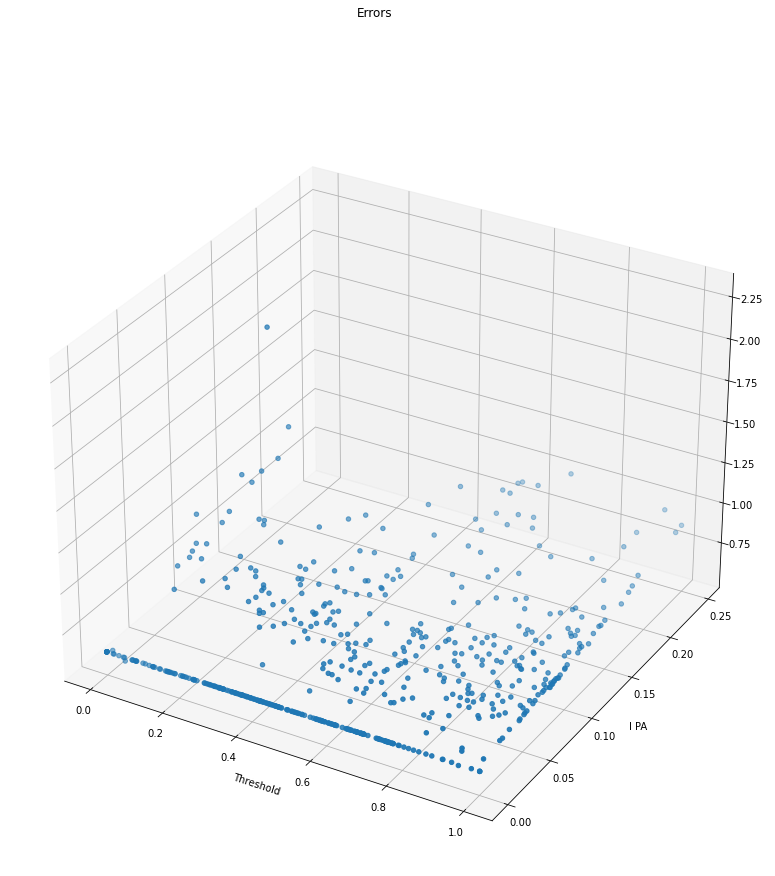

In [11]:
fig = plt.figure(figsize=((14,14)))

fig.suptitle('Errors')

cm = plt.get_cmap("RdYlGn")

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(thres_h_all, ipa_h_all, cost_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')

### 1.3 Best-fitting parameters

In [12]:
# Run simulation with best-fitting parameters
opt_par = parameters
opt_error, opt_child, opt_cl, empirical_data = tuning.executeSingle(thres=opt_par[0],
                                                                    ipa=opt_par[1],
                                                                    t=700,
                                                                    population_name='nomination')

thres_PA: 0.5825280423934616  I_PA: 1e-05  error: 0.6092528912832645 |runtime: 5.051583290100098


<AxesSubplot:>

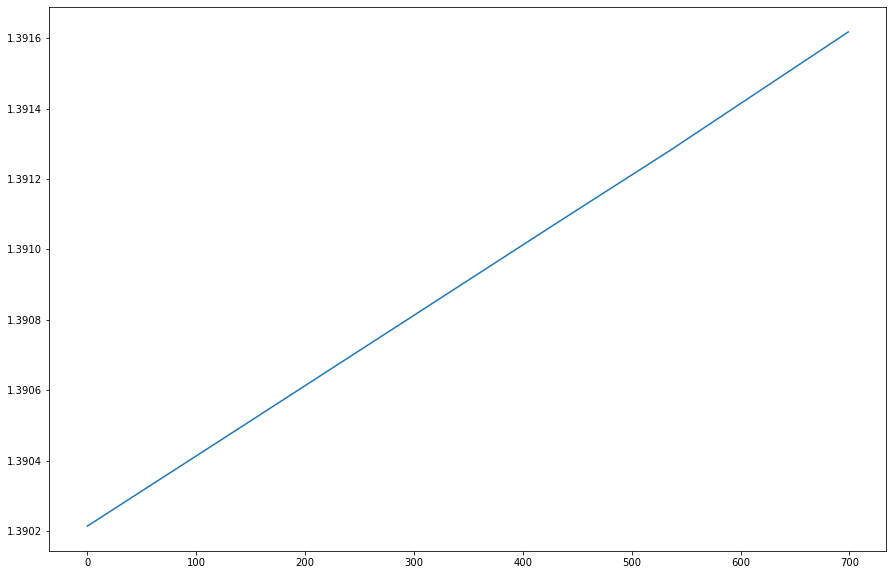

In [13]:
# Plot run with best-fitting parameters
a = pd.DataFrame(opt_cl).mean(axis=1)
a.plot(figsize=((15,10)))


# 2. Communication Network

## 2.1 Run simulated annealing

In [14]:
parameters, error_hist, parameters_hist = tuning.execute(t_initial=0.2,
                                                         i_initial=0.05,
                                                         t=700,
                                                         population_name="communication")

thres_PA:  0.2  I_PA:  0.05 |runtime:  5.44720721244812

Temp:  1.0
1.0 1 thres_PA:  0.14849005378795938  I_PA:  0.05223212828096228 cost:  1.6996032563264745 |runtime:  5.277256965637207
1.0 2 thres_PA:  0.20645385084863588  I_PA:  0.08169281002090131 cost:  1.9537746063642007 |runtime:  5.254583835601807
1.0 3 thres_PA:  0.30003920389830996  I_PA:  0.12005154302896422 cost:  1.9436032292561687 |runtime:  5.379951238632202
1.0 4 thres_PA:  0.35780119339276495  I_PA:  0.07531252195145485 cost:  1.3898536299004112 |runtime:  5.770215749740601
1.0 5 thres_PA:  0.27237067104864604  I_PA:  0.06110591319857516 cost:  1.5333707086729844 |runtime:  5.633965015411377
1.0 6 thres_PA:  0.19413418165212065  I_PA:  0.08906642722796845 cost:  2.152607261559319 |runtime:  5.209508895874023
1.0 7 thres_PA:  0.2170137724972197  I_PA:  0.0183658221505612 cost:  1.4063342463657795 |runtime:  5.504072904586792
1.0 8 thres_PA:  0.28812503255610666  I_PA:  0.004807455620214167 cost:  1.2570952762363492 |ru

### 2.2 Results

In [15]:
min(error_hist)

0.6047237594810118

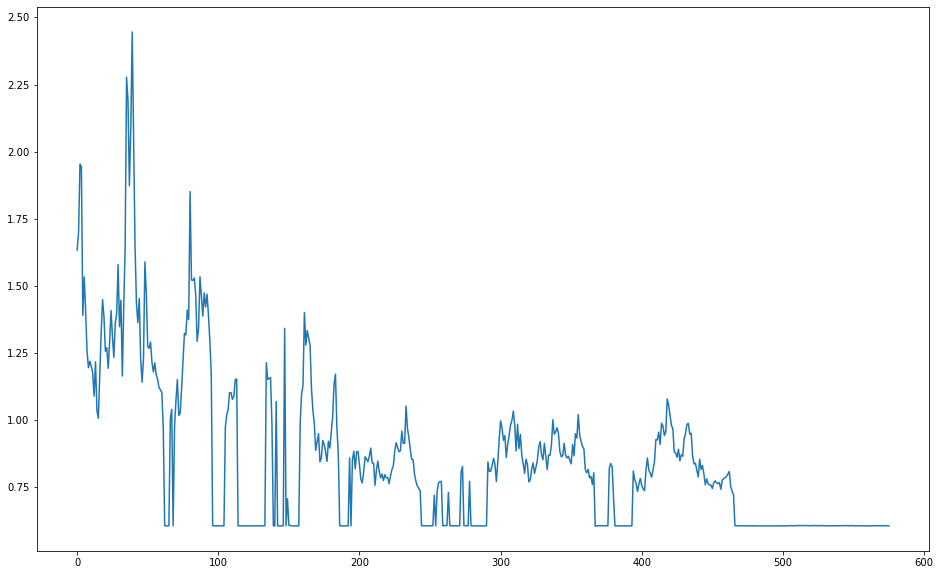

In [16]:
plt.figure(figsize=((16,10)))
plt.plot(error_hist)

In [17]:
thres_h_all = np.asarray([p_all[0] for p_all in parameters_hist])
ipa_h_all = np.asarray([p_all[1] for p_all in parameters_hist])
cost_h_all = np.asarray(error_hist)

Text(0, 0.5, 'I PA')

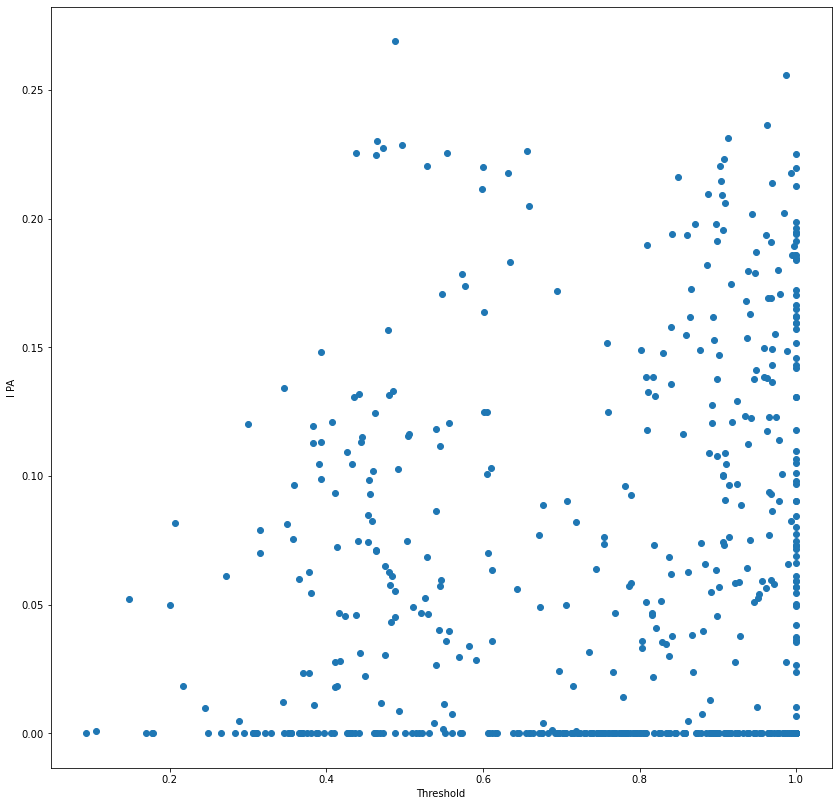

In [18]:
plt.figure(figsize=((14,14)))
plt.scatter(thres_h_all, ipa_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')

### 2.3 Best-fitting parameters

In [19]:
# Run simulation with best-fitting parameters
opt_par = parameters
opt_error, opt_child, opt_cl, empirical_data = tuning.executeSingle(thres=opt_par[0],
                                                                    ipa=opt_par[1],
                                                                    t=700,
                                                                    population_name='peer')

UnboundLocalError: local variable 'population' referenced before assignment

In [ ]:
# Plot run with best-fitting parameters
a = pd.DataFrame(opt_cl).mean(axis=1)
a.plot(figsize=((15,10)))

